# Project

Create a dataframe containing information available from PubChem about the gene IDs, symbols, names, taxonomy IDs, taxonomies, and gene descriptions for the transporter MRFP, and save as a csv file. Also, remove any entries that are unrelated to the transporter protein MYRF. 
- Hint: Refer to the [PUG-REST tutorial](https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest-tutorial).

Next is to prepare a dataframe for regression modeling (i.e. continuous value outcomes) using the PubChem assay ID P49841 for GSK-3B inhibition, and save it to a csv file. Your dataframe should have 4 columns: CID, SMILES, Ki (in micromolar), and pKi. Drop CID duplicates, and keep the CID with the higher pKi value. 
- Hint: pKi can be calculated using the log function in numpy. 

In [825]:
import requests
import urllib.request, urllib.parse, urllib.error
import json
import pandas as pd
import numpy as np

gene = 'MYRF'

response = requests.get(f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/gene/genesymbol/{gene}/aids/TXT')
txt = response.text
aids = txt.split('\n')[:-1]

print(f'There are {len(aids)} assays in PubChem that test for MYRF:\n\n', aids)
txt

There are 12 assays in PubChem that test for MYRF:

 ['1904', '624099', '651810', '651811', '743454', '1117281', '1117357', '1159506', '1159578', '1159584', '1224830', '1508588']


'1904\n624099\n651810\n651811\n743454\n1117281\n1117357\n1159506\n1159578\n1159584\n1224830\n1508588\n'

In [826]:
desc = pd.DataFrame()
n = 0
total = []

for aid in aids:
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/{aid}/summary/JSON'

    try:
        response = requests.get(url)
        temp_df = pd.DataFrame(response.json()['AssaySummaries']['AssaySummary'])[['AID',
                            'Name', 'SourceName', 'CIDCountAll', 'CIDCountActive']]
        total.append(temp_df)
        print(f'{aid} - success')
        
    except urllib.request.URLError:
        print(f'{aid} - AID not found')
        
desc = pd.concat(total)

1904 - success
624099 - success
651810 - success
651811 - success
743454 - success
1117281 - success
1117357 - success
1159506 - success
1159578 - success
1159584 - success
1224830 - success
1508588 - success


In [827]:
desc.sort_values(by='CIDCountActive', ascending=False)

,AID,Name,SourceName,CIDCountAll,CIDCountActive
0,1904,siRNA Circadian Assay,The Genomics Institute of the Novartis Researc...,0,0
0,624099,An siRNA screen for human genes that are invol...,"ICCB-Longwood/NSRB Screening Facility, Harvard...",0,0
0,651810,Genome-wide high-content siRNA screens for reg...,NCGC,0,0
0,651811,Genome-wide high-content siRNA screens for reg...,NCGC,0,0
0,743454,RNAi screen for vorinostat resistance genes - ...,1154,0,0
0,1117281,A whole genome RNAi screen highlights componen...,NCGC,0,0
0,1117357,InfectX: Pathogen infection siRNA screens,10589,0,0
0,1159506,Identification of proteins required for the pr...,NCGC,0,0
0,1159578,A screen to identify genes that regulate lymph...,1154,0,0
0,1159584,A screen to identify synthetic lethal interact...,1154,0,0


In [ ]:
desc.to_csv('myrf_pubchem_assays.csv', index=False)

In [828]:
#ChEMBL database

from chembl_webresource_client.new_client import new_client
chembl_id = "CHEMBL686321"

overview = new_client.assay.get(chembl_id)

# print assay overview
overview



{'aidx': 'CLD0',
 'assay_category': None,
 'assay_cell_type': None,
 'assay_chembl_id': 'CHEMBL686321',
 'assay_classifications': [],
 'assay_organism': None,
 'assay_parameters': [],
 'assay_strain': None,
 'assay_subcellular_fraction': None,
 'assay_tax_id': None,
 'assay_test_type': None,
 'assay_tissue': None,
 'assay_type': 'B',
 'assay_type_description': 'Binding',
 'bao_format': 'BAO_0000357',
 'bao_label': 'single protein format',
 'cell_chembl_id': None,
 'confidence_description': 'Homologous single protein target assigned',
 'confidence_score': 8,
 'description': 'Inhibitory activity against human glycogen synthase kinase-3beta (GSK3-beta) at 100 uM ATP',
 'document_chembl_id': 'CHEMBL1145856',
 'relationship_description': 'Homologous protein target assigned',
 'relationship_type': 'H',
 'src_assay_id': None,
 'src_id': 1,
 'target_chembl_id': 'CHEMBL262',
 'tissue_chembl_id': None,
 'variant_sequence': None}

In [829]:
records = new_client.activity.filter(assay_chembl_id=chembl_id)

print(len(records))
records[0]

15


{'action_type': None,
 'activity_comment': None,
 'activity_id': 105841,
 'activity_properties': [],
 'assay_chembl_id': 'CHEMBL686321',
 'assay_description': 'Inhibitory activity against human glycogen synthase kinase-3beta (GSK3-beta) at 100 uM ATP',
 'assay_type': 'B',
 'assay_variant_accession': None,
 'assay_variant_mutation': None,
 'bao_endpoint': 'BAO_0000190',
 'bao_format': 'BAO_0000357',
 'bao_label': 'single protein format',
 'canonical_smiles': 'O=C1NC(=O)C(c2ccccc2[N+](=O)[O-])=C1Nc1ccc(O)c(Cl)c1',
 'data_validity_comment': None,
 'data_validity_description': None,
 'document_chembl_id': 'CHEMBL1145856',
 'document_journal': 'J Med Chem',
 'document_year': 2003,
 'ligand_efficiency': {'bei': '17.85',
  'le': '0.35',
  'lle': '3.99',
  'sei': '5.28'},
 'molecule_chembl_id': 'CHEMBL322970',
 'molecule_pref_name': None,
 'parent_molecule_chembl_id': 'CHEMBL322970',
 'pchembl_value': '6.42',
 'potential_duplicate': 0,
 'qudt_units': 'http://www.openphacts.org/units/Nanomolar'

In [830]:
import pandas as pd
data = pd.DataFrame(records)
data.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,105841,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,0.38
1,None,None,114696,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,6.92
2,None,None,118600,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,0.41
3,None,None,118601,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,0.16
4,None,None,118602,[],CHEMBL686321,Inhibitory activity against human glycogen syn...,B,None,None,BAO_0000190,...,Homo sapiens,Glycogen synthase kinase-3 beta,9606,None,None,IC50,uM,UO_0000065,None,250.0


In [ ]:
data.to_csv("data/gsk3b_compounds.csv")

In [831]:
#Accessing Other ChEMBL databases
#query by target. We could look up the uniprot ID for gsk-3b and then get all bioactivity information associated with that target


from chembl_webresource_client.new_client import new_client
import pandas as pd

uniprot_id = "P49841"

# Create a ChEMBL web resource client
client = new_client

# Get information about the target using the specified UniProt ID
targets = client.target.filter(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)

# Convert the results to a Pandas DataFrame
target_list = pd.DataFrame(targets)

target_list.head()  # Display the first few rows of the DataFrame


,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Glycogen synthase kinase-3 beta,CHEMBL262,SINGLE PROTEIN
1,Homo sapiens,Glycogen synthase kinase-3,CHEMBL2095188,PROTEIN FAMILY
2,Homo sapiens,Axin-1/Glycogen synthase kinase-3 beta,CHEMBL3883309,PROTEIN-PROTEIN INTERACTION


In [832]:
target_list = pd.DataFrame(targets)
target_list.head()

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Glycogen synthase kinase-3 beta,CHEMBL262,SINGLE PROTEIN
1,Homo sapiens,Glycogen synthase kinase-3,CHEMBL2095188,PROTEIN FAMILY
2,Homo sapiens,Axin-1/Glycogen synthase kinase-3 beta,CHEMBL3883309,PROTEIN-PROTEIN INTERACTION


In [833]:
bioactivities = new_client.activity.filter(target_chembl_id="CHEMBL262", type="IC50", relation="=", assay_type="B").only(
                                                                                                                        "activity_id",
                                                                                                                        "assay_chembl_id",
                                                                                                                        "assay_description",
                                                                                                                        "assay_type",
                                                                                                                        "molecule_chembl_id",
                                                                                                                        "type",
                                                                                                                        "standard_units",
                                                                                                                        "relation",
                                                                                                                        "standard_value",
                                                                                                                        "target_chembl_id",
                                                                                                                        "target_organism",
                                                                                                                        "canonical_smiles"
                                                                                                                    )


In [835]:
bioactivities = pd.DataFrame(bioactivities)
bioactivities.head()

,activity_id,assay_chembl_id,assay_description,assay_type,canonical_smiles,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,105841,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,O=C1NC(=O)C(c2ccccc2[N+](=O)[O-])=C1Nc1ccc(O)c...,CHEMBL322970,=,nM,380.0,CHEMBL262,Homo sapiens,IC50,uM,0.38
1,114696,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,CN(C)Cc1c(-c2n[nH]c(-c3ccncc3)n2)nnn1-c1nonc1N,CHEMBL112564,=,nM,6920.0,CHEMBL262,Homo sapiens,IC50,uM,6.92
2,118600,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,CCN(CC)Cc1c(C(=O)N/N=C/c2ccncc2)nnn1-c1nonc1N,CHEMBL321421,=,nM,410.0,CHEMBL262,Homo sapiens,IC50,uM,0.41
3,118601,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,CN[C@@H]1C[C@H]2O[C@@](C)([C@@H]1OC)n1c3ccccc3...,CHEMBL388978,=,nM,160.0,CHEMBL262,Homo sapiens,IC50,uM,0.16
4,124758,CHEMBL686321,Inhibitory activity against human glycogen syn...,B,NNC(=O)c1nnn(-c2nonc2N)c1CN1CCCCC1,CHEMBL115875,=,nM,9600.0,CHEMBL262,Homo sapiens,IC50,uM,9.6


In [836]:
bioactivities.shape

(2803, 14)

In [401]:
bioactivities.to_csv("/Users/martinnwadiugwu/Downloads/20231114_Data_Science_Class/data/gsk3b_all_assay_activity.csv")

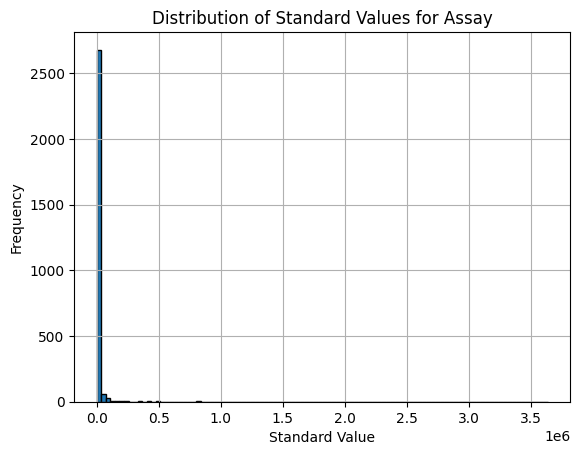

In [837]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = '/Users/martinnwadiugwu/Downloads/20231114_Data_Science_Class/data/gsk3b_all_assay_activity.csv'
df = pd.read_csv(file_path)

# Convert standard values to numeric, ignoring errors for non-numeric values
df['standard_value'] = pd.to_numeric(df['standard_value'], errors='coerce')

# Plotting
plt.hist(df['standard_value'].dropna(), bins=100, edgecolor='k')
plt.xlabel('Standard Value')
plt.ylabel('Frequency')
plt.title('Distribution of Standard Values for Assay')
plt.grid(True)
plt.show()


In [ ]:
# Choose active assays from the bioactivities files of compounds tested

import ssl
from urllib.request import urlopen
import pandas as pd

# Load data from CSV file
file_path = '/Users/martinnwadiugwu/Downloads/20231114_Data_Science_Class/data/gsk3b_all_assay_activity.csv'

# Create an SSL context without certificate verification
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Load the assay activity data
df_activities = pd.read_csv(file_path)

# Iterate over assays
for _, row in df_activities.iterrows():
    aid = row['activity_id']

    # Specify the PubChem assay URL
    url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/{aid}/CSV'

    try:
        # Use the custom SSL context
        response = urlopen(url, context=ssl_context)

        # Read the CSV data into a DataFrame
        df_assay = pd.read_csv(response)

        # The first 5 rows can be removed
        df_assay = df_assay.iloc[5:, :]

        # Limit to columns necessary for modeling
        df_assay = df_assay[['PUBCHEM_CID', 'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME']]

        # Check if the number of rows for each activity outcome is greater than 500
        outcome_counts = df_assay['PUBCHEM_ACTIVITY_OUTCOME'].value_counts()
        if all(outcome_counts > 500):
            # Display the DataFrame for the current assay
            print(f"\nData for Assay {aid}:")
            print(df_assay.head())  # You can modify this to suit your needs

            # Display value counts for 'PUBCHEM_ACTIVITY_OUTCOME'
            print("\nValue Counts for 'PUBCHEM_ACTIVITY_OUTCOME':")
            print(outcome_counts)

            # Print 'active' and 'inactive' rows
            active_inactive_rows = df_assay[df_assay['PUBCHEM_ACTIVITY_OUTCOME'].isin(['active', 'inactive'])]
            print("\nActive and Inactive Rows:")
            print(active_inactive_rows)

            # Sort values by activity to retain duplicates with active outcomes
            active_inactive_rows.sort_values(by='PUBCHEM_ACTIVITY_OUTCOME', inplace=True, ascending=False)
            active_inactive_rows.drop_duplicates(subset=['PUBCHEM_CID'], keep='first', inplace=True)

            # Remove entries with no SMILES
            active_inactive_rows.dropna(subset=['PUBCHEM_EXT_DATASOURCE_SMILES'], inplace=True)
            print("\nValue Counts after Processing:")
            print(active_inactive_rows['PUBCHEM_ACTIVITY_OUTCOME'].value_counts())

        else:
            print(f"\nAssay {aid} does not meet the criteria (>500 compounds for all outcomes).")
            print(outcome_counts)

    except Exception as e:
        print(f"Error processing assay {aid}: {e}")
        continue  # Skip to the next assay


In [304]:
import requests
import json

# Specify the assay AID
assay_aid = 651568 # Enter Bioassay record id

# Make a request to the PubChem API
url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/{assay_aid}/summary/JSON'
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    try:
        # Try to parse the JSON response
        assay_info = json.loads(response.text)

        # Check if the response is a string (HTML error page)
        if isinstance(assay_info, str):
            print(f"Error: {assay_info}")
        else:
            # Check if there are assay summaries
            if 'AssaySummaries' in assay_info:
                # Loop through assay summaries
                for summary in assay_info['AssaySummaries']:
                    if isinstance(summary, dict):  # Check if summary is a dictionary
                        assay_name = summary.get('Assay', {}).get('Name')
                        if assay_name:
                            print(f"Assay Name: {assay_name}")
                    else:
                        print("Error: Unable to retrieve assay information.")
            else:
                print("No assay summaries found.")
    except json.JSONDecodeError:
        print("Error: Unable to parse JSON response.")
else:
    print(f"Error: Unable to retrieve assay information. Status code: {response.status_code}")


Error: Unable to retrieve assay information.


In [509]:
# Import necessary libraries
import ssl
import urllib.request
import pandas as pd

# Create an SSL context without certificate verification
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Specify the PubChem assay URL for GSK-3b inhibition
url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/1684756/CSV'

# Use the custom SSL context
response = urllib.request.urlopen(url, context=ssl_context)

# Read the CSV data into a DataFrame
df = pd.read_csv(response)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Print all column names
print("Column Names:", df.columns)

# Slice the DataFrame, select relevant columns, and rename them
#df = df[['PUBCHEM_CID', 'PUBCHEM_EXT_DATASOURCE_SMILES']]
#df.rename(columns={'PUBCHEM_CID': 'CID', 'PUBCHEM_EXT_DATASOURCE_SMILES': 'SMILES'}, inplace=True)

# Display the refined DataFrame
print("\nRefined DataFrame:")
print(df)

# Handle non-numeric values in the 'Ki' column
# Note: Replace 'AbsAC40_uM' with the correct column name representing the inhibition constant ('Ki')
if 'AbsAC40_uM' in df.columns:
    df['AbsAC40_uM'] = pd.to_numeric(df['AbsAC40_uM'], errors='coerce')

    # Remove rows with NaN values in the 'Ki' column
    df = df.dropna(subset=['AbsAC40_uM'])

    # Calculate pKi (commented out as 'Ki' is not explicitly defined in the provided columns)
    # df['pKi'] = -(np.log10(df['Ki']))

    # Sort the DataFrame by 'pKi' (commented out as 'pKi' is not explicitly defined)
    # df.sort_values(by='pKi', inplace=True, ascending=False)

    # Keep only the first occurrence of each unique 'CID'
    df.drop_duplicates(subset=['PUBCHEM_CID'], keep='first', inplace=True)

    # Print the final DataFrame
    print("\nFinal DataFrame:")
    print(df)

    # Print all column names after processing
    print("Final Column Names:", df.columns)
else:
    print("Column 'AbsAC40_uM' not found in the DataFrame.")


Original DataFrame:
                         PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                               RESULT_TYPE          NaN          NaN   
1                              RESULT_DESCR          NaN          NaN   
2                               RESULT_UNIT          NaN          NaN   
3            RESULT_IS_ACTIVE_CONCENTRATION          NaN          NaN   
4  RESULT_IS_ACTIVE_CONCENTRATION_QUALIFIER          NaN          NaN   
5                                         1  461515256.0   91801204.0   

                       PUBCHEM_EXT_DATASOURCE_SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0                                                NaN                      NaN   
1                                                NaN                      NaN   
2                                                NaN                      NaN   
3                                                NaN                      NaN   
4                                                NaN           

In [839]:
import ssl
import urllib.request
import pandas as pd
import numpy as np

# Create an SSL context without certificate verification
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Specify the PubChem assay URL
url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/assay/aid/1684756/CSV'

# Use the custom SSL context
response = urllib.request.urlopen(url, context=ssl_context)

# Read the CSV data into a DataFrame
df = pd.read_csv(response)

# Print all column names
print("Original Column Names:", df.columns)

# Slice the DataFrame, select relevant columns, and rename them
#df = df[['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
 #        'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
  #       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
   #      'PUBCHEM_ASSAYDATA_COMMENT', 'Phenotype', 'Potency', 'Efficacy',
    #     'Analysis Comment', 'Activity_Score', 'Curve_Description',
     #    'Fit_LogAC50', 'Fit_HillSlope', 'Fit_R2', 'Fit_InfiniteActivity',
      #   'Fit_ZeroActivity', 'Fit_CurveClass', 'Excluded_Points', 'Max_Response',
       #  'Activity at 0.00368 uM', 'Activity at 0.018 uM',
        # 'Activity at 0.092 uM', 'Activity at 0.460 uM', 'Activity at 2.300 uM',
         #'Activity at 11.50 uM', 'Activity at 57.50 uM', 'Compound QC']]

# Rename the selected columns
df.rename(columns={'PUBCHEM_CID': 'CID', 'PUBCHEM_EXT_DATASOURCE_SMILES': 'SMILES'}, inplace=True)

# Handle non-numeric values in the 'Ki' column
#df['Ki'] = pd.to_numeric(df['Ki'], errors='coerce')

# Remove rows with NaN values in the 'Ki' column
#df = df.dropna(subset=['Ki'])

# Calculate pKi
#df['pKi'] = -(np.log10(df['Ki']))

# Sort the DataFrame by 'pKi'
#df.sort_values(by='pKi', inplace=True, ascending=False)

# Keep only the first occurrence of each unique 'CID'
df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

# Print the final DataFrame
print("Final DataFrame:")
print(df)

# Print all column names after processing
print("Final Column Names:", df.columns)


Original Column Names: Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME',
       'PUBCHEM_ACTIVITY_SCORE', 'PUBCHEM_ACTIVITY_URL',
       'PUBCHEM_ASSAYDATA_COMMENT', 'PubChem Standard Value', 'Standard Type',
       'Standard Relation', 'Standard Value', 'Standard Units'],
      dtype='object')
Final DataFrame:
  PUBCHEM_RESULT_TAG  PUBCHEM_SID         CID  \
0        RESULT_TYPE          NaN         NaN   
5                  1  461515256.0  91801204.0   

                                              SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0                                                NaN                      NaN   
5  C1CC(CCC1O)OC2=CC=CC3=CN=C(N=C32)NC4=CC5=C(C=C...                   Active   

   PUBCHEM_ACTIVITY_SCORE  PUBCHEM_ACTIVITY_URL  PUBCHEM_ASSAYDATA_COMMENT  \
0                     NaN                   NaN                        NaN   
5                     NaN                   NaN               

In [511]:

#df.Ki = df.Ki.astype(float)
#df['pKi'] = -(np.log10(df.Ki))

#df.sort_values(by='pKi', inplace=True, ascending=False)
#df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

In [512]:
df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,PubChem Standard Value,Standard Type,Standard Relation,Standard Value,Standard Units
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT,STRING,STRING,FLOAT,STRING
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PubChem standardized value transformed from 'S...,Standardized activity type (e.g. IC50 rather t...,"Qualifier (e.g. >, <, =) for 'Standard Value'",Standardized activity value transformed to com...,Selected units for 'Standard Type': e.g. conce...
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR,NaN,NaN,NaN,NaN
3,RESULT_IS_ACTIVE_CONCENTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,NaN,NaN,NaN,NaN
4,RESULT_IS_ACTIVE_CONCENTRATION_QUALIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE,NaN,NaN
5,1,461515256.0,91801204.0,C1CC(CCC1O)OC2=CC=CC3=CN=C(N=C32)NC4=CC5=C(C=C...,Active,NaN,NaN,NaN,0.021,IC50,=,21,nM


In [841]:
import numpy as np

# Keep only the first occurrence of each unique 'CID'
df.drop_duplicates(subset=['CID'], keep='first', inplace=True)


In [842]:
df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,CID,SMILES,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,PubChem Standard Value,Standard Type,Standard Relation,Standard Value,Standard Units
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT,STRING,STRING,FLOAT,STRING
5,1,461515256.0,91801204.0,C1CC(CCC1O)OC2=CC=CC3=CN=C(N=C32)NC4=CC5=C(C=C...,Active,NaN,NaN,NaN,0.021,IC50,=,21,nM


In [843]:
df['PUBCHEM_ACTIVITY_OUTCOME'].value_counts()

Active    1
Name: PUBCHEM_ACTIVITY_OUTCOME, dtype: int64

In [844]:
df.rename(columns={'PUBCHEM_CID': 'CID', 'PUBCHEM_EXT_DATASOURCE_SMILES': 'SMILES', 'PUBCHEM_ACTIVITY_OUTCOME': 'ACTIVITY'}, 
         inplace=True)

df.drop(df[df['ACTIVITY'] == 'Inconclusive'].index, inplace=True)
df.drop(df[df['ACTIVITY'] == 'Unspecified'].index, inplace=True)

df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,CID,SMILES,ACTIVITY,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,PubChem Standard Value,Standard Type,Standard Relation,Standard Value,Standard Units
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FLOAT,STRING,STRING,FLOAT,STRING
5,1,461515256.0,91801204.0,C1CC(CCC1O)OC2=CC=CC3=CN=C(N=C32)NC4=CC5=C(C=C...,Active,NaN,NaN,NaN,0.021,IC50,=,21,nM


In [845]:
conditions = [(df['ACTIVITY'] == 'Active'), (df['ACTIVITY'] == 'Inactive')]
values = [1, 0]
df['ACTIVITY'] = np.select(conditions, values)

df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,CID,SMILES,ACTIVITY,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,PubChem Standard Value,Standard Type,Standard Relation,Standard Value,Standard Units
0,RESULT_TYPE,NaN,NaN,NaN,0,NaN,NaN,NaN,FLOAT,STRING,STRING,FLOAT,STRING
5,1,461515256.0,91801204.0,C1CC(CCC1O)OC2=CC=CC3=CN=C(N=C32)NC4=CC5=C(C=C...,1,NaN,NaN,NaN,0.021,IC50,=,21,nM


In [846]:
# Sort values by activity to retain duplicates with active outcomes
df.sort_values(by='ACTIVITY', inplace=True, ascending=False)
df.drop_duplicates(subset=['CID'], keep='first', inplace=True)

# Remove entries with no SMILES
df.dropna(subset=['SMILES'], inplace=True)
df

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,CID,SMILES,ACTIVITY,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,PubChem Standard Value,Standard Type,Standard Relation,Standard Value,Standard Units
5,1,461515256.0,91801204.0,C1CC(CCC1O)OC2=CC=CC3=CN=C(N=C32)NC4=CC5=C(C=C...,1,NaN,NaN,NaN,0.021,IC50,=,21,nM


In [847]:
df['ACTIVITY'].value_counts()

1    1
Name: ACTIVITY, dtype: int64

In [520]:
# Save to a csv file
df.to_csv('active/AID_1684756_updated.csv', index=False)

In [848]:
import pandas as pd

# Read CSV file
df = pd.read_csv('AllActiveCID.csv', index_col=None)
df

,PUBCHEM_SID,CID,SMILES,ACTIVITY
0,103358883,10365181,C1CN2CCC1[C@H](C2)OC(=O)[C@@](C/C=C/I)(C3=CC=C...,1
1,103189559,6436265,C[C@H]1CCC[C@@H](N1C)/C=C/[C@@H]2[C@H]3CCCC[C@...,1
2,103270704,1687,CN1C2CCC1CC(C2)OC(C3=CC=CC=C3)C4=CC=C(C=C4)Cl,1
3,103674286,45262613,C=CCN1C2CCC1CC(C2)OC(C3=CC=CC=C3)C4=CC=C(C=C4)...,1
4,103674287,45262614,C=CCN1C2CCC1CC(C2)OC(C3=CC=C(C=C3)Cl)C4=CC=C(C...,1
...,...,...,...,...
3620,14736811,1291609,COC1=C(C=CC(=C1)S(=O)(=O)N2CCCCC2)NC(=O)/C=C/C...,0
3621,14735827,949169,COC1=CC=CC=C1N2C=NC3=C2C=CC(=C3)NCC4=CC=CS4,0
3622,14735750,694035,CC1=CC(=C2C=C(C=CC2=N1)Br)C(=O)NN,0
3623,14735286,2901168,C1CN(CCN1C(=O)COC2=CC=C(C=C2)C3=CC=CC=C3)S(=O)...,0


In [849]:

# Slice the DataFrame, select relevant columns, and rename them
#df = df[['CID', 'SMILES', 'ACTIVITY', 'Ki','pKi', 'Fit_LogAC50']]
df = df[['CID', 'SMILES', 'ACTIVITY']]

# Display the DataFrame
df


,CID,SMILES,ACTIVITY
0,10365181,C1CN2CCC1[C@H](C2)OC(=O)[C@@](C/C=C/I)(C3=CC=C...,1
1,6436265,C[C@H]1CCC[C@@H](N1C)/C=C/[C@@H]2[C@H]3CCCC[C@...,1
2,1687,CN1C2CCC1CC(C2)OC(C3=CC=CC=C3)C4=CC=C(C=C4)Cl,1
3,45262613,C=CCN1C2CCC1CC(C2)OC(C3=CC=CC=C3)C4=CC=C(C=C4)...,1
4,45262614,C=CCN1C2CCC1CC(C2)OC(C3=CC=C(C=C3)Cl)C4=CC=C(C...,1
...,...,...,...
3620,1291609,COC1=C(C=CC(=C1)S(=O)(=O)N2CCCCC2)NC(=O)/C=C/C...,0
3621,949169,COC1=CC=CC=C1N2C=NC3=C2C=CC(=C3)NCC4=CC=CS4,0
3622,694035,CC1=CC(=C2C=C(C=CC2=N1)Br)C(=O)NN,0
3623,2901168,C1CN(CCN1C(=O)COC2=CC=C(C=C2)C3=CC=CC=C3)S(=O)...,0


In [850]:
df['ACTIVITY'].value_counts()
#df.to_csv('ALL_AID_new_update3.csv', index=False)

0    3335
1     290
Name: ACTIVITY, dtype: int64

In [855]:
import pandas as pd
import numpy as np

# Read CSV file
df = pd.read_csv('AllActiveCID.csv', index_col=None)

# Remove duplicates based on the 'CID' column
df_no_duplicates = df.drop_duplicates(subset='CID')

# Display the value counts of 'ACTIVITY' in the new DataFrame without duplicates
print(df_no_duplicates['ACTIVITY'].value_counts()) 

# Filter rows with 'ACTIVITY' equal to 1
df_ones = df_no_duplicates[df_no_duplicates['ACTIVITY'] == 1]

# Randomly select 225 samples with 'ACTIVITY' equal to 0
df_zeros_sampled = df_no_duplicates[df_no_duplicates['ACTIVITY'] == 0].sample(n=225, random_state=123)

# Concatenate the two DataFrames
df_new = pd.concat([df_ones, df_zeros_sampled])

# Shuffle the new DataFrame
df_new = df_new.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the value counts of 'ACTIVITY' in the new DataFrame
print(df_new['ACTIVITY'].value_counts())


0    1212
1     225
Name: ACTIVITY, dtype: int64
0    225
1    225
Name: ACTIVITY, dtype: int64


In [543]:
# Save to a csv file
df_new.to_csv('ALL_AID_new_update2.csv', index=False)

In [852]:
#histogram showing the distribution of pKi values
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.histplot(df.pKi)

#plt.savefig('AID_651568_histplot.png')

#plt.show()

In [856]:
#Load dataset containing compound SMILES using Pandas
import pandas as pd
from rdkit import Chem

# 1.1 Read the CompoundWithSIMLES.csv dataset (same as the homework)
print(data.head())


  action_type activity_comment  activity_id activity_properties  \
0        None             None       105841                  []   
1        None             None       114696                  []   
2        None             None       118600                  []   
3        None             None       118601                  []   
4        None             None       118602                  []   

  assay_chembl_id                                  assay_description  \
0    CHEMBL686321  Inhibitory activity against human glycogen syn...   
1    CHEMBL686321  Inhibitory activity against human glycogen syn...   
2    CHEMBL686321  Inhibitory activity against human glycogen syn...   
3    CHEMBL686321  Inhibitory activity against human glycogen syn...   
4    CHEMBL686321  Inhibitory activity against human glycogen syn...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  ...  \
0          B                    None                   None  BAO_0000190  ...   
1 

In [858]:
#data = pd.read_csv('AID_651568_new_update.csv', index_col=["CID"])
data = pd.read_csv('ALL_AID_new_update2.csv', index_col=["CID"])
data.head()
#data.count()

,PUBCHEM_SID,SMILES,ACTIVITY
CID,,,
44202427,85201343,C[C@H]1CN(C(=O)CC2=C(C=CC(=C2)NC(=O)CCC(F)(F)F...,0
6859360,26665593,C1=CC=C(C=C1)/C=C(/C=N/N2C(=NNC2=S)C3=CC=CO3)\Cl,0
56970797,136927966,CCCCCCCCCCCCCCCCCCCCOC[C@@H]1CCC[C@H]1OP(=O)([...,1
44570103,103607948,CN(C)C(CCOC(=O)N(C)C)C1=CC=CC=C1,1
653149,850617,COC1=C(C=C2C(N(CCC2=C1)C(=O)C3CC3)C4=CC5=CC(=C...,0


In [859]:
# Generate machine-readable descriptors of compounds for modeling
# we will use the RDKit library to calculate molecular descriptors for the created RDKit molecular objects and store these descriptors in a new DataFrame

# Load dataset containing compound SMILES using Pandas
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen
from rdkit.ML.Descriptors import MoleculeDescriptors

# Create RDKit molecular objects based on SMILES
mol_objects = [Chem.MolFromSmiles(smiles) for smiles in data['SMILES']]

# Calculate RDKit descriptors
calc = MoleculeDescriptors.MolecularDescriptorCalculator([desc[0] for desc in Descriptors.descList])
descriptors = pd.DataFrame([calc.CalcDescriptors(mol) for mol in mol_objects], columns=calc.GetDescriptorNames(), index=data.index)

# Calculate logP using RDKit's Crippen method
descriptors['logP'] = [Crippen.MolLogP(mol) for mol in mol_objects]

# Calculate other descriptors related to distribution and permeability
# For example, you can use the ALOGP descriptor for lipophilicity
descriptors['ALOGP'] = [Crippen.MolMR(mol) for mol in mol_objects]

# Calculate a simplified version of log BB using a combination of descriptors
# Note: This is just an example; you may need to adapt based on your specific requirements
descriptors['logBB'] = descriptors['ALOGP'] - descriptors['logP']

# Display the DataFrame with descriptors and log BB
print(descriptors)


          MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  \
CID                                                              
44202427          13.316075       13.316075           0.053291   
6859360            6.172257        6.172257           0.353544   
56970797          12.211224       12.211224           0.147983   
44570103          11.320776       11.320776           0.264965   
653149            13.406015       13.406015           0.035266   
...                     ...             ...                ...   
46742370          10.578704       10.578704           0.243577   
20959120          12.895262       12.895262           0.208509   
739449            12.527210       12.527210           0.265047   
15999416           5.514799        5.514799           0.794852   
46742348           4.737590        4.737590           0.071245   

          MinEStateIndex       qed    MolWt  HeavyAtomMolWt  ExactMolWt  \
CID                                                               

In [860]:
#descriptors.to_csv('descriptors_validation.csv')

In [861]:
# 2.4 Scale the descriptors DataFrame using scikit-learn's StandardScaler
from sklearn.preprocessing import StandardScaler

# (1) Initialize StandardScaler object
scaler = StandardScaler()

# (2) Fit the StandardScaler to the data of descriptors 
# (compute the mean and standard deviation of each descriptor for scaling)
scaler.fit(descriptors)

# (3) Scale descriptor values using the fitted StandardScaler
standard_desc = scaler.transform(descriptors)

# (4) Store the scaled descriptors in a new dataframe
scaled_descriptors = pd.DataFrame(standard_desc, index=descriptors.index, columns=descriptors.columns)
scaled_descriptors.head()


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,logP,ALOGP,logBB
CID,,,,,,,,,,,,,,,,,,,,,
44202427,0.873403,0.873403,-0.751601,-2.028051,-0.464572,1.096305,1.109644,1.097169,1.093020,0.0,...,-0.047193,-0.106,-0.204124,-0.047193,-0.257586,-0.192214,-0.081923,-0.093916,0.797435,0.816807
6859360,-1.737734,-1.737734,0.942073,0.828388,0.134243,-0.391396,-0.351001,-0.393358,-0.530369,0.0,...,-0.047193,-0.106,-0.204124,-0.047193,-0.257586,-0.192214,-0.081923,0.230954,-0.409865,-0.426656
56970797,0.469569,0.469569,-0.217460,-1.903406,-2.469430,0.886916,0.713618,0.888006,1.121009,0.0,...,-0.047193,-0.106,-0.204124,-0.047193,-0.257586,7.751315,-0.081923,2.576619,1.035662,0.959867
44570103,0.144102,0.144102,0.442414,0.446749,1.305218,-0.836580,-0.899756,-0.835578,-0.670317,0.0,...,-0.047193,-0.106,-0.204124,-0.047193,-0.257586,-0.192214,-0.081923,-0.875357,-0.760874,-0.743259
653149,0.906277,0.906277,-0.853278,0.305515,0.279656,0.348482,0.347827,0.349490,0.421273,0.0,...,-0.047193,-0.106,-0.204124,-0.047193,-0.257586,-0.192214,-0.081923,-0.264767,0.384748,0.402304


In [862]:
#Machine learning modeling using calculated descriptors
# Prepare the training sets for both the scaled_descriptors and the target endpoint (logBB)

X = scaled_descriptors
y = data['ACTIVITY']
y

CID
44202427    0
6859360     0
56970797    1
44570103    1
653149      0
           ..
46742370    1
20959120    0
739449      0
15999416    0
46742348    1
Name: ACTIVITY, Length: 450, dtype: int64

In [876]:
y_val.value_counts()

0    330
1    103
Name: ACTIVITY, dtype: int64

In [868]:
import os
print(os.getcwd())

/Users/martinnwadiugwu/Downloads/20231115 Data Collection 2/Data Collection Solutions



Missing Values in Descriptors Before Imputation:
MaxAbsEStateIndex    0
MaxEStateIndex       0
MinAbsEStateIndex    0
MinEStateIndex       0
qed                  0
                    ..
fr_unbrch_alkane     0
fr_urea              0
logP                 0
ALOGP                0
logBB                0
Length: 212, dtype: int64
Missing Values in Original Training Data:
PUBCHEM_SID    0
SMILES         0
ACTIVITY       0
dtype: int64

Missing Values in Target Variable in Training Data:
0
Logistic Regression Training Time: 9.53 seconds
K-Nearest Neighbors Training Time: 0.02 seconds
Random Forest Training Time: 0.48 seconds
SVM Training Time: 0.02 seconds
XGBoost Training Time: 4.70 seconds
10/10 [==============================] - 0s 8ms/step - loss: 0.2847 - accuracy: 0.8889
Neural Network Training Time: 0.21 seconds
10/10 [==============================] - 0s 12ms/step - loss: 0.3070 - accuracy: 0.8730
Neural Network Training Time: 0.27 seconds


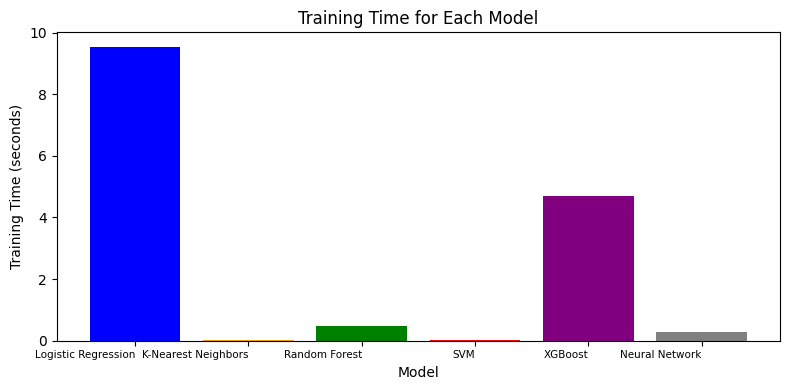

10/10 [==============================] - 1s 5ms/step - loss: 0.8670 - accuracy: 0.5587
Neural Network Training Time: 0.76 seconds
Epoch 1/10
10/10 [==============================] - 0s 32ms/step - loss: 0.7455 - accuracy: 0.5968 - val_loss: 0.5390 - val_accuracy: 0.7556
Epoch 2/10
10/10 [==============================] - 0s 14ms/step - loss: 0.6236 - accuracy: 0.7143 - val_loss: 0.4918 - val_accuracy: 0.7630
Epoch 3/10
10/10 [==============================] - 0s 14ms/step - loss: 0.5844 - accuracy: 0.7111 - val_loss: 0.4657 - val_accuracy: 0.7778
Epoch 4/10
10/10 [==============================] - 0s 12ms/step - loss: 0.5488 - accuracy: 0.7333 - val_loss: 0.4475 - val_accuracy: 0.7778
Epoch 5/10
10/10 [==============================] - 0s 26ms/step - loss: 0.4912 - accuracy: 0.7905 - val_loss: 0.4250 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 0s 16ms/step - loss: 0.4518 - accuracy: 0.8063 - val_loss: 0.4135 - val_accuracy: 0.8148
Epoch 7/10
10/10 [======

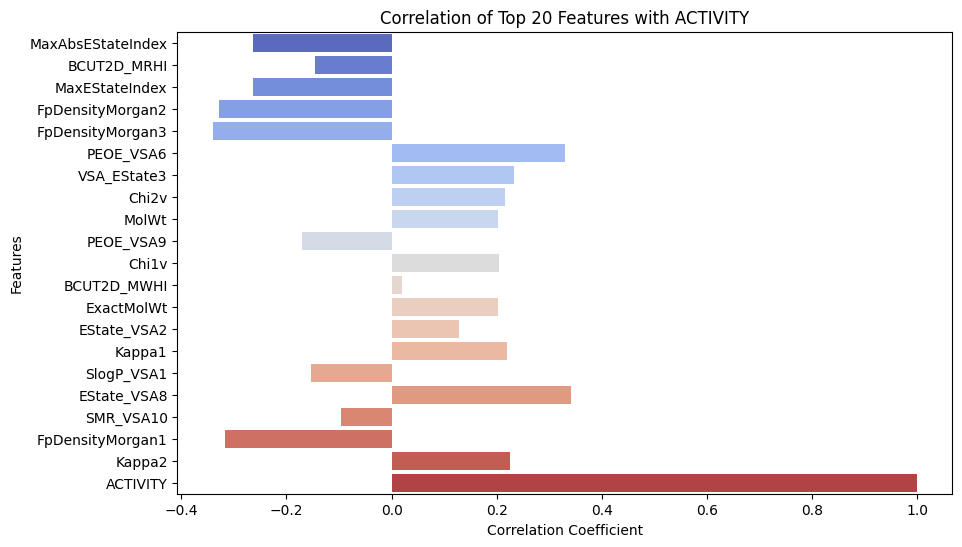


Logistic Regression Coefficients (Variable Importance):


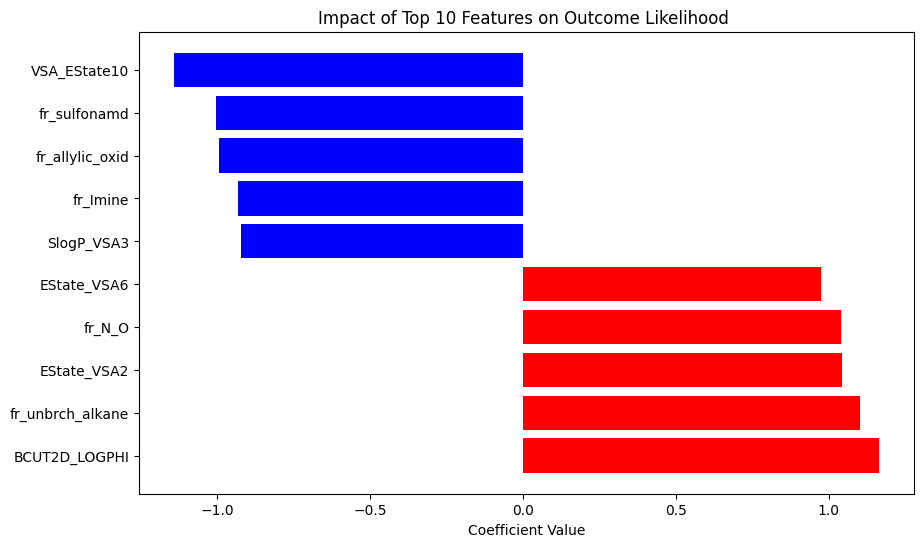

In [999]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, roc_auc_score
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

# Function to measure training time for a model
def measure_training_time(model, X_train_scaled, y_train):
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    return end_time - start_time

# Function to evaluate models on a given dataset
def evaluate_models(models, model_names, X, y, data_name):
    for model, name in zip(models, model_names):
        # Make predictions using the current model
        y_pred = model.predict(X)
        calculate_and_print_metrics(y_pred, y, name, data_name)

# Function to train and print training time for each model
def train_and_print_time(model, X_train_scaled, y_train, model_name):
    training_time = measure_training_time(model, X_train_scaled, y_train)
    print(f"{model_name} Training Time: {training_time:.2f} seconds")
    return training_time

# Adjusted function to calculate and print metrics for a given model
def calculate_and_print_metrics(y_pred, y_true, model_name, data_name):
    if len(np.unique(y_pred)) > 2 or model_name == 'Neural Network':
        # Handle continuous predictions (e.g., probabilities)
        y_pred_binary = (y_pred >= 0.5).astype(int)
    else:
        # Assume binary predictions
        y_pred_binary = y_pred

    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)

    # Calculate R-squared (not common for classification)
    r_squared = r2_score(y_true, y_pred)

    print(f"\n{model_name} Metrics ({data_name}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"R-squared: {r_squared:.4f}")

    # Additional metric for binary classification: AUC-ROC
    if len(np.unique(y_pred_binary)) == 2 or model_name == 'Neural Network':
        auc_roc = roc_auc_score(y_true, y_pred)
        print(f"AUC-ROC: {auc_roc:.4f}")

# Load datasets and descriptors
data_train = pd.read_csv('ALL_AID_new_update2.csv', index_col="CID")
data_validation = pd.read_csv('Validation_AID.csv', index_col="CID")
descriptors = pd.read_csv('descriptors3.csv', index_col=0)

# Check for Missing Values in Descriptors
print("\nMissing Values in Descriptors Before Imputation:")
print(descriptors.isnull().sum())

# Impute missing values in descriptors with mean
imputer = SimpleImputer(strategy='mean')
descriptors_imputed = imputer.fit_transform(descriptors)

# Print missing values in the original training data
print("Missing Values in Original Training Data:")
print(data_train.isnull().sum())

# Check for Missing Values in Target Variable
print("\nMissing Values in Target Variable in Training Data:")
print(data_train['ACTIVITY'].isnull().sum())

# Drop rows with missing values in the target variable
data_train_cleaned = data_train.dropna(subset=['ACTIVITY'])

# Create a DataFrame for the target variable 'ACTIVITY' in the training data
target_train = data_train_cleaned['ACTIVITY']

# Split the training data into training and validation sets with a 70-30 split
X_train, X_val, y_train, y_val = train_test_split(
    descriptors_imputed, target_train, test_size=0.3, random_state=123
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Create models
log_model = LogisticRegression(random_state=123)
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier(random_state=123)
svm_model = SVC(random_state=123)
xgb_model = XGBClassifier(random_state=123)

# Cross-validation scores
log_cv_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=10)
knn_cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=10)
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=10)
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=10)
xgb_cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=10)

# Train and print training times for each model
training_times = {}
for model, name in zip([log_model, knn_model, rf_model, svm_model, xgb_model, nn_model],
                       ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'SVM', 'XGBoost', 'Neural Network']):
    time_taken = train_and_print_time(model, X_train_scaled, y_train, name)
    if time_taken is not None:
        training_times[name] = time_taken

# Add neural network separately to training_times
nn_time = train_and_print_time(nn_model, X_train_scaled, y_train, "Neural Network")
if nn_time is not None:
    training_times['Neural Network'] = nn_time

# Plot training times
plt.figure(figsize=(8, 4))
plt.bar(training_times.keys(), training_times.values(), color=['blue', 'orange', 'green', 'red', 'purple', 'gray'])
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for Each Model')

# Reduce font size for x-axis labels
plt.xticks(rotation=0, ha="right", fontsize=7.5)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Neural Network Model
nn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Measure the time taken for training the neural network
train_and_print_time(nn_model, X_train_scaled, y_train, "Neural Network")


# Train models on the training data
for model, name in zip([log_model, knn_model, rf_model, svm_model, xgb_model],
                       ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'SVM', 'XGBoost']):
    model.fit(X_train_scaled, y_train)

# Train the neural network
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Make predictions on the validation set
log_pred = log_model.predict(X_val_scaled)
knn_pred = knn_model.predict(X_val_scaled)
rf_pred = rf_model.predict(X_val_scaled)
svm_pred = svm_model.predict(X_val_scaled)
xgb_pred = xgb_model.predict(X_val_scaled)
nn_pred = (nn_model.predict(X_val_scaled) >= 0.5).astype(int)  # Convert to binary

# Combine predictions using majority voting
ensemble_pred = (log_pred + knn_pred + rf_pred + svm_pred + xgb_pred + nn_pred.flatten()) >= 3

# Ensure y_val is in the correct format
y_val_binary = (y_val >= 0.5).astype(int)

# Evaluate the performance of each model on the validation set
models = [log_model, knn_model, rf_model, svm_model, xgb_model, nn_model]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'SVM', 'XGBoost', 'Neural Network']
evaluate_models(models, model_names, X_val_scaled, y_val_binary, 'Validation Set')

# Calculate and print metrics for each model on the test set
evaluate_models(models, model_names, X_test_scaled, y_test.astype(int), 'Test Set')

# Check for Missing Values in Original Validation Data
print("\nMissing Values in Original Validation Data:")
print(data_validation.isnull().sum())

# Check for Missing Values in Target Variable in Validation Data
print("\nMissing Values in Target Variable in Validation Data:")
print(data_validation['ACTIVITY'].isnull().sum())

# Drop rows with missing values in the target variable in the validation data
data_validation_cleaned = data_validation.dropna(subset=['ACTIVITY'])

# Create a DataFrame for the target variable 'ACTIVITY' in the validation data
y_new = data_validation_cleaned['ACTIVITY']

# Load descriptors for new validation data
descriptors_validation = pd.read_csv('descriptors_validation.csv', index_col=0)

# Check for Missing Values in Descriptors for Validation Data
print("\nMissing Values in Validation Descriptors Before Imputation:")
print(descriptors_validation.isnull().sum())

# Impute missing values in descriptors for validation data with mean
descriptors_validation_imputed = imputer.transform(descriptors_validation)

# Standardize features for validation data
X_val_new_scaled = scaler.transform(descriptors_validation_imputed)

# Shuffle the data for validation
X_val_new_scaled, y_val = shuffle(X_val_new_scaled, y_new, random_state=123)

# Evaluate the performance of each model on the new validation data
evaluate_models(models, model_names, X_val_new_scaled, y_val, 'New Validation Data')

# Make predictions on the test set
log_pred_test = log_model.predict(X_test_scaled)
knn_pred_test = knn_model.predict(X_test_scaled)
rf_pred_test = rf_model.predict(X_test_scaled)
svm_pred_test = svm_model.predict(X_test_scaled)
xgb_pred_test = xgb_model.predict(X_test_scaled)
nn_pred_test = (nn_model.predict(X_test_scaled) >= 0.5).astype(int)  # Convert to binary

# Combine predictions using majority voting for the test set
ensemble_pred_test = (log_pred_test + knn_pred_test + rf_pred_test + svm_pred_test + xgb_pred_test + nn_pred_test.flatten()) >= 3

# Ensure y_test is in the correct format
y_test_binary = (y_test >= 0.5).astype(int)

# Calculate and print metrics for the ensemble model on the test set
calculate_and_print_metrics(ensemble_pred_test, y_test_binary, 'Ensemble Model', 'Test Set')

# Make predictions on the new validation data
log_pred_new = log_model.predict(X_val_new_scaled)
knn_pred_new = knn_model.predict(X_val_new_scaled)
rf_pred_new = rf_model.predict(X_val_new_scaled)
svm_pred_new = svm_model.predict(X_val_new_scaled)
xgb_pred_new = xgb_model.predict(X_val_new_scaled)
nn_pred_new = (nn_model.predict(X_val_new_scaled) >= 0.5).astype(int)  # Convert to binary

# Combine predictions using majority voting for the new validation data
ensemble_pred_new = (log_pred_new + knn_pred_new + rf_pred_new + svm_pred_new + xgb_pred_new + nn_pred_new.flatten()) >= 3


# Calculate and print metrics for the ensemble model on the validation set
calculate_and_print_metrics(ensemble_pred, y_val_binary, 'Ensemble Model', 'Validation Set')

# Calculate and print metrics for the ensemble model on the test set
calculate_and_print_metrics(ensemble_pred_test, y_test_binary, 'Ensemble Model', 'Test Set')

# Calculate and print metrics for the ensemble model on the new validation data
calculate_and_print_metrics(ensemble_pred_new, y_val, 'Ensemble Model', 'New Validation Data')

# Print feature importance for Random Forest
print("\nRandom Forest Feature Importance:")
print(rf_model.feature_importances_)

# Extract the top 20 features based on importance
top_20_indices = np.argsort(rf_model.feature_importances_)[::-1][:20]
top_20_features = descriptors.columns[top_20_indices]

# Ensure the selected features are in the DataFrame
selected_features = [feature for feature in top_20_features if feature in descriptors.columns]

# Create a DataFrame with the selected features and 'ACTIVITY'
heatmap_data = descriptors[selected_features].copy()
heatmap_data['ACTIVITY'] = target_train  # Assuming 'ACTIVITY' is the target variable in the original data

# Calculate the correlation between selected features and 'ACTIVITY'
correlation_matrix = heatmap_data.corr()

# Create a bar plot for the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix['ACTIVITY'].values, y=correlation_matrix.index, palette='coolwarm')
plt.title('Correlation of Top 20 Features with ACTIVITY')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


# Print the coefficients (variable importance) for Logistic Regression
print("\nLogistic Regression Coefficients (Variable Importance):")
coefficients = log_model.coef_[0]
coef_df = pd.DataFrame({'Feature': descriptors.columns, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Separate top 5 positive and top 5 negative coefficients
top_5_positive = coef_df.head(5)
top_5_negative = coef_df.tail(5)

# Concatenate to get the final top 10 (5 positive, 5 negative)
top_10_coef = pd.concat([top_5_positive, top_5_negative])

# Plot the top 10 coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_10_coef['Feature'], top_10_coef['Coefficient'], color=np.where(top_10_coef['Coefficient'] > 0, 'r', 'b'))
plt.xlabel('Coefficient Value')
plt.title('Impact of Top 10 Features on Outcome Likelihood ')
plt.show()

